# Predicting the video

In [1]:
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2

In [2]:
#WORKING PROJECT
import numpy as np
import argparse
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os
import time
from keras.models import load_model
from collections import deque



In [6]:
def print_results(video):
    # Load the model
    print("Loading model ...")
    model = load_model('modelnew.h5')
    # Capture video
    vs = cv2.VideoCapture(video)
    (W, H) = (None, None)

    while True:
        # Read the next frame from the file
        (grabbed, frame) = vs.read()

        # If the frame was not grabbed, then we have reached the end of the stream
        if not grabbed:
            break

        # If the frame dimensions are empty, grab them
        if W is None or H is None:
            (H, W) = frame.shape[:2]

        # Clone the output frame
        output = frame.copy()

        # Convert frame to RGB, resize, and normalize
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (128, 128)).astype("float32")
        frame = frame.reshape(1, 128, 128, 3) / 255

        # Make predictions on the frame
        preds = model.predict(frame)[0]

        # Determine label based on threshold
        label = (preds > 0.50)[0]

        # Define text color
        text_color = (0, 0, 255) if label else (0, 255, 0)

        # Construct label text
        text = "Violence: {}".format(label)
        FONT = cv2.FONT_HERSHEY_SIMPLEX

        # Calculate text position relative to image size
        text_x = int(0.05 * W)  # 5% from the left
        text_y = int(0.1 * H)   # 10% from the top

        # Draw label on the frame
        cv2.putText(output, text, (text_x, text_y), FONT, 0.75, text_color, 2)

        output_filename = 'identified_output.jpg'    # write the output frame to disk
        cv2.imwrite(output_filename, output)
        # Release the video capture object
        vs.release()

        # Show the output image
        cv2_imshow(output)

        break  # Exit after processing the first frame

    print("[INFO] Cleaning up...")


In [ ]:
V_path = "/content/V_917.mp4"
NV_path = "/content/NV_432.mp4"

In [12]:
vidpath = "/content/WhatsAppVideo.mp4"

Loading model ...


1/1 [==============================] - 1s 1s/step


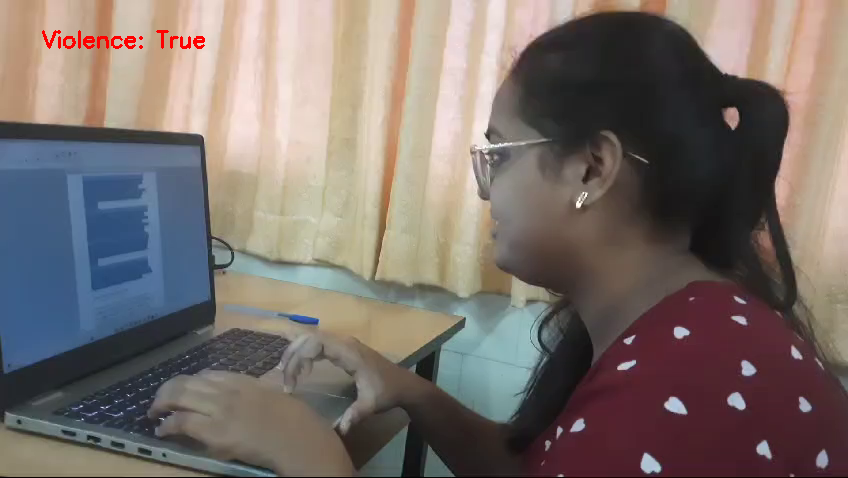

[INFO] Cleaning up...


In [14]:
print_results(vidpath)